<a href="https://colab.research.google.com/github/BlancaCC/ComputacionNumerica/blob/main/practica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 1

In [ ]:
from matplotlib import pyplot as plt

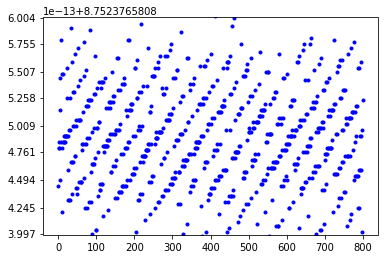

In [ ]:
def rational_function(x: float) -> float:
  num = 4 * x**4 - 59 * x**3 + 324 * x**2 - 751*x + 622
  den = x**4 - 14 * x**3 + 72 * x**2 - 151*x + 112
  return num / den

def get_value(i: int) -> float:
  return 1.606 + 2**-52 * i

def plotting(function):
  i_values = list()
  y_values = list()
  amount_of_iterations = 800

  for i in range(amount_of_iterations):
    i_values.append(i)
    y_values.append(function(get_value(i)))

  plt.plot(i_values, y_values,'b.')
  plt.ylim(8.7523765807784,8.7523765807786)

plotting(rational_function)

#Ejercicio 2


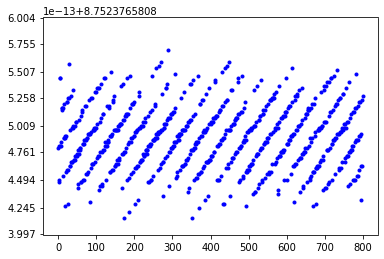

In [ ]:
def f_b(x: float) -> float:
  num = 622 + x * (-751 + x * (324 + x * (-59 + 4 * x)))
  den = 112 + x * (-151 + x * (72 + x * (-14 + x)))
  return num / den

plotting(f_b)

# Ejercicio 3

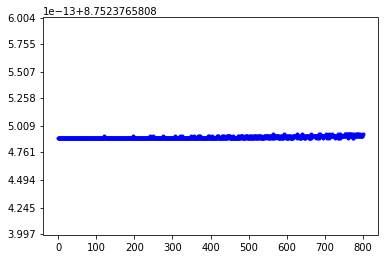

In [ ]:
def f_c(x: float) -> float:
  num = 3*(x - 2)*((x - 5)**2 + 4)
  den = x + (x - 2)**2*((x - 5)**2 + 3)
  return 4 - num / den

plotting(f_c)